# Customer Churn - Modeling

## Imports

In [18]:
#%pip install Flask

In [19]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from pprint import pprint


## Read in data 

In [20]:
df = pd.read_csv('backend/data/processed/customer_churn_fe.csv')
df.head()


,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,...,PaymentMethod_electroniccheck,PaymentMethod_mailedcheck,PackageTier_basic,PackageTier_high_end,PackageTier_mid_tier,PackageTier_premium,TenureCategory_1_to_3yr_customer,TenureCategory_3_plus_customer,TenureCategory_new_customer,count_of_services
0,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,3
1,34,1,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,4
2,2,1,0,1,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,5
3,45,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,4
4,2,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,3


In [21]:
# split into x and y variables

# target variable - churn
y = df['Churn']

# x variables
X = df.drop(columns='Churn')

#print("\nTarget variable:")
#print(y.head())

#print("\nX variables:")
#X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tenure                            7043 non-null   int64  
 1   PhoneService                      7043 non-null   int64  
 2   MultipleLines                     7043 non-null   int64  
 3   OnlineSecurity                    7043 non-null   int64  
 4   OnlineBackup                      7043 non-null   int64  
 5   DeviceProtection                  7043 non-null   int64  
 6   TechSupport                       7043 non-null   int64  
 7   StreamingTV                       7043 non-null   int64  
 8   StreamingMovies                   7043 non-null   int64  
 9   PaperlessBilling                  7043 non-null   int64  
 10  MonthlyCharges                    7043 non-null   float64
 11  TotalCharges                      7043 non-null   float64
 12  Intern

In [22]:
# check for imbalance data in our target variable
print(y.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


since our target variable is imbalanced, let's try to oversample the minority to ensure our model can accurately predict

In [23]:
from imblearn.over_sampling import SMOTE

# resampling 
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(X_resampled)

       tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0           1             0              0               0             1   
1          34             1              0               1             0   
2           2             1              0               1             1   
3          45             0              0               1             0   
4           2             1              0               0             0   
...       ...           ...            ...             ...           ...   
10343       2             1              1               0             0   
10344      38             1              1               0             0   
10345       4             0              0               0             0   
10346       1             1              0               0             0   
10347       6             1              0               0             0   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                

In [86]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=23)

scalar = StandardScaler()

# scale training floats ====
# select the float types
train_cols_to_scale = X_train.select_dtypes(include=['float64']).columns
# transform
train_scaled_cols = scalar.fit_transform(X_train[train_cols_to_scale])
# rewrite the previous values to the scaled values
X_train[train_cols_to_scale] = train_scaled_cols.astype(float)


# scale testing floats
test_cols_to_scale = X_test.select_dtypes(include=['float64']).columns
test_scaled_cols = scalar.fit_transform(X_test[test_cols_to_scale])
X_test[test_cols_to_scale] = test_scaled_cols.astype(float)

## Logistic Regression

First, we will a baseline model - the logistic regression to get a fundamental understanding of our data and how well our a baseline model performs with it.

### Fit model

In [101]:
# instantiate the model
log_model = LogisticRegression(random_state=23)

print(X_train)

# fit
log_model.fit(X_train,y_train)

# predict 
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:,1]


       tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
8242        1             1              1               0             0   
7684       29             1              1               0             0   
227         1             1              0               0             0   
5681       34             1              0               0             0   
9391        1             1              0               0             0   
...       ...           ...            ...             ...           ...   
6175       32             1              0               1             1   
9704       13             1              0               0             0   
10185       8             1              1               0             0   
9256        1             1              1               0             0   
8787       24             0              0               0             0   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
8242             

/Users/jacktorrealba/Desktop/ML/customer_churn_predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

In [88]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[904 133]
 [186 847]]


Text(50.722222222222214, 0.5, 'Actual label')

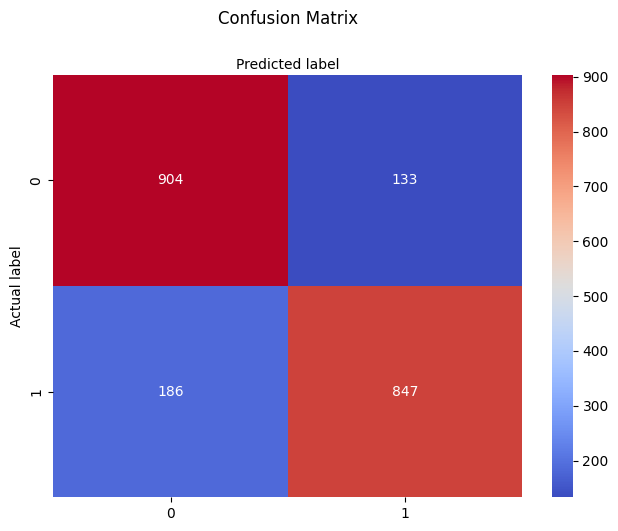

In [89]:
# visualize confusion matrix with a heatmap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

### Classification Report

In [90]:
target_names = ["no churn", "churn"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.83      0.87      0.85      1037
       churn       0.86      0.82      0.84      1033

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



When it comes to analyzing our model results, we want to focus on the false negatives - in this case the recall. 
The close the recall is to 1 then the better our model is at identifying true negatives.This is especially important in predicting customer churn because any false negatives is missed revenue

### Area Under the Curve

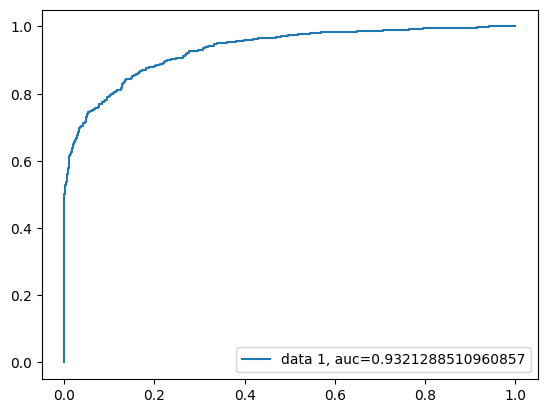

In [91]:
y_pred_prob = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

### Fit model

In [92]:
rf = RandomForestClassifier(random_state=23)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Confusion Matrix

In [93]:
rf_cnf_matrix = confusion_matrix(y_test,y_pred)
print(rf_cnf_matrix)

[[877 160]
 [179 854]]


### Classification Report

In [94]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1037
           1       0.84      0.83      0.83      1033

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



The base Random Forest model can predict customer churn very well but lacks the accuracy in predicting true positives as we can tell from the precision score. Let's apply some hyperparameter tuning to see if this can be improved without affecting the model's recall

### Hyperparameter Tuning

Key Parameters:
* n_estimators: the amount of trees in our random forest
* max_depth: max number of levels in the trees
* min_samples_split: min number of samples required to split a node (helps prevent overfitting)

In [95]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples for node split
    'min_samples_leaf': [1, 2, 4],  # Min samples in leaf
    'max_features': ['sqrt', 'log2'],  # Features per tree
    'bootstrap': [True, False]  # Sampling method
}

rf = RandomForestClassifier(random_state=23)
rf_random = RandomizedSearchCV(
    rf, 
    param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_iter=50, 
    n_jobs=-1)

rf_random.fit(X_train, y_train)

print("\nBest parameters found:")
pprint(rf_random.best_params_)
print(f"\nBest cross validation score: {rf_random.best_score_:.4f}")


Best parameters found:
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

Best cross validation score: 0.9297


### Run Tuned Random Forest Model

In [96]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

### New Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual label')

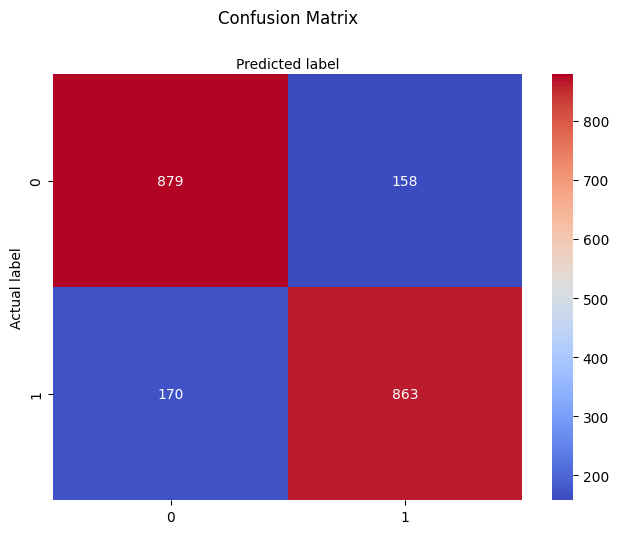

In [97]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with a heatmap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

### New Classification Report

In [98]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1037
           1       0.85      0.84      0.84      1033

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



## Check for overfitting

### Logistic Regression

In [99]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions on training and test sets
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# AUC-ROC scores
train_auc = roc_auc_score(y_train, log_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("\nAUC-ROC Train:", train_auc)
print("AUC-ROC Test:", test_auc)

Mean CV Accuracy: 0.855 (+/- 0.020)
Train Accuracy: 0.8477893210920512
Test Accuracy: 0.8458937198067633

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4137
           1       0.86      0.84      0.85      4141

    accuracy                           0.85      8278
   macro avg       0.85      0.85      0.85      8278
weighted avg       0.85      0.85      0.85      8278


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1037
           1       0.86      0.82      0.84      1033

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070


AUC-ROC Train: 0.933663243754114
AUC-ROC Test: 0.9321288510960857


No overfitting from the Logistic Regression. 
* Overall model accuracy stayed the same between training and testing.
* Recall increased when the model was exposed to new data which indicates the model found good patterns in the training data and was able to learn those patterns instead of memorizing them
* AUC-ROC value is close to 1 for both the train and test sets which indicates that the model can predict the right outcome around 92% of the time

### Random Forest

In [100]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions on training and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# AUC-ROC scores
train_auc = roc_auc_score(y_train, best_rf.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("\nAUC-ROC Train:", train_auc)
print("AUC-ROC Test:", test_auc)

Mean CV Accuracy: 0.855 (+/- 0.020)
Train Accuracy: 0.937545300797294
Test Accuracy: 0.8415458937198068

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4137
           1       0.93      0.94      0.94      4141

    accuracy                           0.94      8278
   macro avg       0.94      0.94      0.94      8278
weighted avg       0.94      0.94      0.94      8278


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1037
           1       0.85      0.84      0.84      1033

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070


AUC-ROC Train: 0.9891536068125995
AUC-ROC Test: 0.9231568462530141


We can see clear overfit for the Random Forest
* Training accuracy is significantly higher than the testing accuracy which means the model just memorized the training data, thus failing to predict the correct outcomes when met with new data
* Though the AUC-ROC values are high, the testing value is much lower than the training value, again indicating overfit

# Final Thoughts

Based on the classification reports and the AUC-ROC values, we were able to identify that the Logisitc Regression is the better model for prediciting customer churn in this dataset. The Random Forest performed poorly as it suffered from overfitting. This could be due to the fact that there are linear relationships between the features and the target variable which would make the simpler logistic regression outperfom the random forest since random forests thrive off of complex, non-linear data. Let's confirm if our features and target variable have a linear relationship

### Verify Feature Relationship with Target Variable

By checking the coefficients of our features, we can identify what features have a linear relationship with the target variable. Since we implemented SMOTE oversampling on the training set, we need to make sure that the coefficients remained intact after oversampling to ensure we didn't alter any fundamental relationships in the original data.

In [40]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": log_model.coef_[0]})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print("\nCoefficients BEFORE oversampling the training data:")
print(coefficients)

coefficient_after_SMOTE = pd.DataFrame({"Feature": X_resampled.columns, "Coefficient": log_model.coef_[0]})
coefficient_after_SMOTE = coefficient_after_SMOTE.sort_values(by="Coefficient", ascending=False)
print("\nCoefficients AFTER oversampling the training data:")
print(coefficient_after_SMOTE)


Coefficients BEFORE oversampling the training data:
                             Feature  Coefficient
15           Contract_month_to_month     0.353002
9                   PaperlessBilling     0.280737
29                 count_of_services     0.112978
28       TenureCategory_new_customer     0.112814
27    TenureCategory_3_plus_customer     0.090021
10                    MonthlyCharges     0.062210
11                      TotalCharges     0.000744
22                 PackageTier_basic    -0.052838
0                             tenure    -0.070169
12               InternetService_dsl    -0.212068
14                InternetService_no    -0.351191
24              PackageTier_mid_tier    -0.375835
2                      MultipleLines    -0.434075
23              PackageTier_high_end    -0.440848
13        InternetService_fiberoptic    -0.604462
8                    StreamingMovies    -0.637827
7                        StreamingTV    -0.671391
26  TenureCategory_1_to_3yr_customer    -0.7604

Coefficients match up which means we successfully didn't alter any relationships with the oversampling technique. We can also see from the high negative or positive coefficients that a decent amount of our features have linear relationships with the target variable

Now that we see that select features have a linear relationship with the target variable, it makes sense why the logistic regression would perform better than the Random Forest.